In [4]:
# downloading the website directly from kaggle.
# it installs it on my computer
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

In [21]:
files = api.dataset_download_files("alxmamaev/flowers-recognition")
# beware of whether you are downloading from a competition or from a dataset. separate fct's
#api.competition_download_files

In [15]:
import kaggle
#competitions = api.competitions_list(search='cat',category="playground")
competitions = api.competitions_list(search='flowers')
# competitions is a list of competition objects.
# iterate though each item to access individual competition
for comp in competitions:
    print(comp.ref,comp.reward,comp.userRank,sep=',')

flower-classification-with-tpus,Prizes,None


In [18]:
datasets=api.dataset_list(search='flowers')
 
# datasets is a collection of dataset
for dat in  datasets:
     print(dat.ref,dat.viewCount,dat.voteCount,sep=',')

alxmamaev/flowers-recognition,185661,896
cdeotte/oxford-flowers-tfrecords,1108,37
mgornergoogle/five-flowers,1806,13
saidakbarp/17-category-flowers,5323,14
msheriey/104-flowers-garden-of-eden,2077,25
arshid/iris-flower-dataset,95217,214
spaics/hackathon-blossom-flower-classification,5202,21
ianmoone0617/flower-goggle-tpu-classification,1606,10
olgabelitskaya/flower-color-images,30882,116
lenine/flower-102diffspecies-dataset,2574,9
allenjie/flowers17,485,2
aksha05/flower-image-dataset,596,4
gverzea/edible-wild-plants,12228,55
apollo2506/flowers-recognition-dataset,38,2
msheriey/104-flowers-submissions,216,4
vikrishnan/iris-dataset,8218,20
calebeverett/flowers-tpu-openimage-tfrecords,204,4
calebeverett/flowers-tta,140,1
alimodd/flower-shop-dataset,1815,6
rishitchs/final-flowers-course-project-dataset,174,4


In [ ]:
%%capture # should be the first line in the cell, nothing can come before it. not even comments
# supresses the output of this cell

!unzip zippo.zip
# https://technowhisp.com/kaggle-api-python-documentation/
# how to use the kaggle's python api

In [23]:
%%capture # supresses the output of this cell
!unzip flowers-recognition.zip

In [42]:
import os

train_path = os.path.abspath("flowers/Training")
img_width, img_height = 150, 150 # i tested a bunch of different sizes

In [53]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # conv layer 1
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    # conv layer 2
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    # conv layer 3
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), # changed 128 to 64 here. maybe gon help with
    # undergitting
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    
    # conv layer 4
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    # dense layer 1
    tf.keras.layers.Dense(512, activation='relu'), # 512 - 256 - 512
    tf.keras.layers.BatchNormalization(),
    # why do we actually add the fully-connected layer before the output?
    # so we can process all the data linearly? we essentially condensed the whole image
    # into a really small image using the conv and pooling layers.
    # so to make an actual prediction, we need to "process" the data in that image.
    # which we haven't done. we just made the image less sparse
    tf.keras.layers.Dropout(0.2),
    
    # dense layer 2
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    # prediction layer
    tf.keras.layers.Dense(5, activation='softmax') # 6 classes
])

In [54]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(1./255, # normalize the data
                                   # but how do i know that 255 is the max value? what if it's smth else?
                                   # or is it always 255?
                                   validation_split = 0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest'
                                  )

In [47]:
train_generator = train_datagen.flow_from_directory(
        train_path,  # This is the source directory for training images
        batch_size=50, # increased the batch size from 16 to 50
        target_size = (img_width, img_height),
        class_mode='categorical',
        subset = "training")

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = train_datagen.flow_from_directory(
        train_path,
        batch_size=50,
        target_size = (img_width, img_height),
        class_mode='categorical',
        subset = "validation")

Found 3462 images belonging to 5 classes.
Found 861 images belonging to 5 classes.


In [55]:
history = model.fit(
      train_generator,
      steps_per_epoch=50, # Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch
      epochs=20,
      validation_data=validation_generator,
      shuffle = True,
      validation_steps=10, # Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch 
      verbose=2)

Epoch 1/20
50/50 - 60s - loss: 1.5244 - accuracy: 0.4310 - val_loss: 5.8461 - val_accuracy: 0.2600
Epoch 2/20
50/50 - 58s - loss: 1.2358 - accuracy: 0.5068 - val_loss: 2.1905 - val_accuracy: 0.4320
Epoch 3/20
50/50 - 59s - loss: 1.1690 - accuracy: 0.5406 - val_loss: 1.2832 - val_accuracy: 0.5200
Epoch 4/20
50/50 - 55s - loss: 1.0868 - accuracy: 0.5670 - val_loss: 1.3498 - val_accuracy: 0.5400
Epoch 5/20
50/50 - 56s - loss: 1.0490 - accuracy: 0.5820 - val_loss: 1.2077 - val_accuracy: 0.5740
Epoch 6/20
50/50 - 54s - loss: 0.9722 - accuracy: 0.6129 - val_loss: 1.1245 - val_accuracy: 0.6360
Epoch 7/20
50/50 - 53s - loss: 0.9443 - accuracy: 0.6344 - val_loss: 1.2125 - val_accuracy: 0.5740
Epoch 8/20
50/50 - 56s - loss: 0.8972 - accuracy: 0.6556 - val_loss: 1.1008 - val_accuracy: 0.5900
Epoch 9/20
50/50 - 56s - loss: 0.8940 - accuracy: 0.6487 - val_loss: 1.0163 - val_accuracy: 0.5940
Epoch 10/20
50/50 - 64s - loss: 0.8300 - accuracy: 0.6832 - val_loss: 1.0497 - val_accuracy: 0.6180
Epoch 11/

In [ ]:
#model.save("flowers.h5")
from tensorflow.keras.models import load_model
model = load_model("flowers.h5")

In [82]:
#%cd flowers/Training
!cd /Users/elenabukreeva/Desktop/jupyter
!pwd
!find . -type f | cut -d"/" -f2 | uniq -c
#!ls  /Users/elenabukreeva/Desktop/jupyter/flowers/Training/*| xargs -n1 ls | wc -l

/Users/elenabukreeva/Desktop/jupyter/flowers/Training
   1 .DS_Store
 769 daisy
 784 rose
 984 tulip
1055 dandelion
 734 sunflower


In [93]:
history1 = model.fit(
      train_generator,
      steps_per_epoch=50, # Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch
      epochs=120,
      initial_epoch = 100,
      validation_data=validation_generator,
      shuffle = True,
      validation_steps=10, # Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch 
      verbose=2)

/Users/elenabukreeva/Library/Python/3.7/lib/python/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 101/120
50/50 - 51s - loss: 0.2884 - accuracy: 0.8976 - val_loss: 0.8604 - val_accuracy: 0.7360
Epoch 102/120
50/50 - 53s - loss: 0.2565 - accuracy: 0.9052 - val_loss: 0.7753 - val_accuracy: 0.7840
Epoch 103/120
50/50 - 61s - loss: 0.2497 - accuracy: 0.9100 - val_loss: 0.8058 - val_accuracy: 0.7560
Epoch 104/120
50/50 - 78s - loss: 0.2273 - accuracy: 0.9124 - val_loss: 0.6584 - val_accuracy: 0.7780
Epoch 105/120
50/50 - 69s - loss: 0.2357 - accuracy: 0.9143 - val_loss: 1.0760 - val_accuracy: 0.7100
Epoch 106/120
50/50 - 61s - loss: 0.2590 - accuracy: 0.9013 - val_loss: 0.6585 - val_accuracy: 0.7840
Epoch 107/120
50/50 - 63s - loss: 0.2249 - accuracy: 0.9124 - val_loss: 0.8951 - val_accuracy: 0.7460
Epoch 108/120
50/50 - 64s - loss: 0.2533 - accuracy: 0.9100 - val_loss: 0.6871 - val_accuracy: 0.7760
Epoch 109/120
50/50 - 62s - loss: 0.2100 - accuracy: 0.9257 - val_loss: 0.7333 - val_accuracy: 0.7740
Epoch 110/120
50/50 - 61s - loss: 0.2450 - accuracy: 0.9127 - val_loss: 0.7684 - v

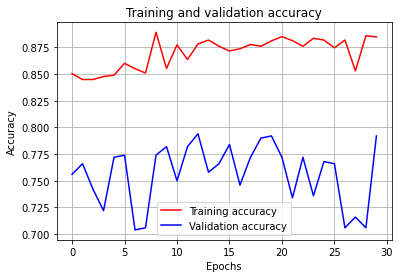

In [92]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.grid(axis='both')

plt.show() 

In [ ]:
# https://www.kaggle.com/hammaadali/short-custom-cnn-flowers-recognition-model

In [42]:
WEIGHTS_PATH = ('https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
WEIGHTS_PATH_NO_TOP = ('https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [50]:
from tensorflow.keras import applications
img_width, img_height = 224, 224 # resnet50 input
inception_base = applications.ResNet50(weights="weights_pretrained/resnet50_weights_notop.h5",
                                       include_top=False, input_shape = (224, 224, 3))

ValueError: Shapes (1, 1, 256, 512) and (512, 128, 1, 1) are incompatible

In [ ]:
# tasks:
# figure out how to test the accuracy on the test set
# common patterns among the architectures
# why does mine not work

# steps per epoch, val steps. how can i balance the speed of training each epoch with the 
# effectiveness of each epoch


# try two dense layers instead of one